##                                                                  CS 559 Hwk 9

  ### Xiaohan Liu                             659692941                                        Nov 29 2017

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
from scipy.interpolate import RectBivariateSpline

#### Q1.
(100pts) In this computer project, we will design an RBF network. You cannot use any existing machine
learning library. As usual, please include the computer codes in your report. We will use the same sun-
mountain setup as in HW8.

#### (a)  Redo steps (a) and (b) of HW8.

In [8]:
np.random.seed(21)
X = np.random.uniform(0,1,size=200).reshape((2,100))
# ith column of X is X_i

ctgy = np.ones(100)
for i in range(X.shape[1]):
    if (X[1,i] >= 0.2 * np.sin(10*X[0,i])+0.3) and ((X[1,i]-0.8)**2 + (X[0,i]-0.5)**2 >= 0.15**2):
            ctgy[i] = -1
t = np.arange(0,1,0.002)
yt = 0.2* np.sin(10*t) +0.3
X = np.vstack((X,ctgy))
C1 = X[:,X[2,:] ==1][0:2,:]
CN1 = X[:,X[2,:] ==-1][0:2,:]

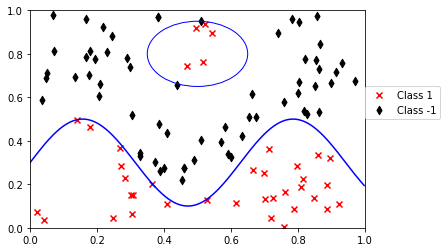

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(Circle((0.5,0.8), 0.15, color = 'b', fill = False))
ax.plot(t,yt,color = 'b')
pt1 = plt.scatter(x = C1[0,:], y = C1[1,:],c ='r', marker = 'x')
pt2 = plt.scatter(x = CN1[0,:], y = CN1[1,:],c ='k', marker = 'd')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend([pt1,pt2],('Class 1', 'Class -1'), loc = (1,0.5))
plt.show()

![ ](b.png)

I picked the Gaussian radial basis function:$\phi(r) = exp(-\frac{||r||}{2})$

In [10]:
#### Get the 10 centers of Class 1 by K-means algo
# define function to classify each point to its nearest center
def center_class(x,center):
    c = center.shape[1]
    class_assgn = np.argmin(cdist(x.T,center.T), axis = 1)
    temp = np.vstack((x,class_assgn))
    new =np.zeros((2,c))
    for l in range(c):
        temp1 = np.mean(temp[0:2,temp[2,:] == l],1)
        new[:,l] = temp1
    return new

# get all the Class 1 points' coordinates
Xp = X[0:2,X[2,:]==1]
# initialize the initial centers randomly w/our replace
num_of_center_p= 10
indp = np.random.choice(np.arange(Xp.shape[1]), num_of_center_p, replace = False)
centerp = Xp[:,indp]

## Inplement the K-means for Class1
c1 = 0
delta_0 = 1e-6
while True:
    temp = center_class(Xp,centerp)
    delta = sum(np.diagonal(cdist(centerp.T,temp.T)))
    if (delta > delta_0):
        centerp = temp
        c1 +=1
    else:
        break

# get all the Class 1 points' coordinates
Xn = X[0:2,X[2,:]==-1]
# initialize the initial centers randomly w/our replace
num_of_center_n= 10
indn = np.random.choice(np.arange(Xn.shape[1]), num_of_center_n, replace = False)
centern = Xn[:,indn]
## Inplement the K-means for Class1
c2 = 0
while True:
    temp = center_class(Xn,centern)
    delta = sum(np.diagonal(cdist(centern.T,temp.T)))
    if (delta > delta_0):
        centern = temp
        c2 +=1
    else:
        break

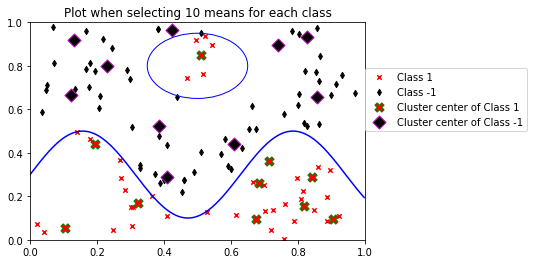

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(Circle((0.5,0.8), 0.15, color = 'b', fill = False))
ax.plot(t,yt,color = 'b')
pt1 = plt.scatter(x = C1[0,:], y = C1[1,:],c ='r', marker = 'x', s = 20)
pt2 = plt.scatter(x = CN1[0,:], y = CN1[1,:],c ='k', marker = 'd', s = 20)
pt3 = plt.scatter(x = centerp[0,:], y = centerp[1,:], c = 'r', marker = 'X', s = 85, edgecolors = 'g')
pt4 = plt.scatter(x = centern[0,:], y = centern[1,:], c = 'k', marker = 'D', s = 85, edgecolors = 'm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend([pt1,pt2,pt3,pt4],('Class 1', 'Class -1','Cluster center of Class 1','Cluster center of Class -1'), loc = (1,.5))
plt.title('Plot when selecting 10 means for each class')
plt.show()

![ ](c.png)

In [6]:
np.random.seed(3)
# Get the desired output
D = X[2,:]
# replace -1 by 0
D = np.heaviside(D,1)
# Define the Radial basis function
def rbf(x, y, sigma = 1):
    x = x.reshape((2,-1))
    dis = cdist(x.T, y.T)
    return np.exp(-0.5*np.sqrt(dis)/sigma**2)
# combine the centers from 2 classes
centers = np.hstack((centerp,centern))
# learning rate
eta = 1
# convergence threshold
epsi = 0
# epoch number 
epoch = 0
m = 579
# initialize errors
errors = np.zeros((m,1))
# initialize real outputs given the current w
y = np.zeros((100,1))
# initialize w
w = np.random.rand(21)
conti = True
# realize PTA
while conti ==True:
    if epoch >=m:
        print('Not converged yet, need more epoches.')
        print('But the results are saved.')
        break
    else:
        for i in range(100): 
            # this part of the loop where we calculate the errors
            inp = rbf(X[0:2,i],centers) # this is the input after the transformation with the 20 centers via rbf
            inp = np.append(inp,1) # append a 1 as the place for bias
            v = inp@w  # calc the local induced field
            out = np.heaviside(v,1)  #compute the output
            diff = out - D[i]
            if diff != 0:
                errors[epoch,:] += 1
            # this part of the loop where we update the weights
            w += eta*(D[i]-np.heaviside(v,1)) * inp.T
        
        epoch += 1
        conti = errors[(epoch-1),:]/100 > epsi
        conti = conti.astype(bool)
w0 = w

AttributeError: module 'numpy' has no attribute 'heaviside'

In [289]:
# Define a discriminant function g(x)
def disc (x):
    inp = rbf(x,centers) # this is the input after the transformation with the 20 centers via rbf
    inp = np.append(inp,1) # append a 1 as the place for bias
    return inp@w0

In [290]:
# mesh out the decision boundaries
epsilon = 5e-2
H0x1 = list()
H0x2 = list()

for x1 in np.arange(0,1,0.001):
    for x2 in np.arange(0,1,0.001):
        x = np.array([x1,x2])
        temp = disc(x)
        if np.abs(temp) < epsilon:
            H0x1.append(x1)
            H0x2.append(x2)

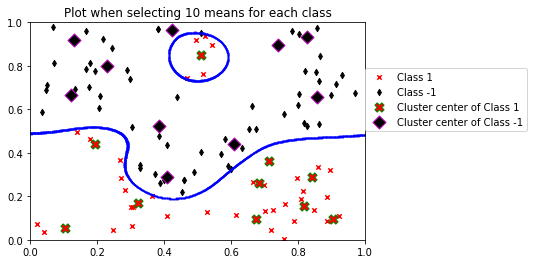

In [299]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
pt1 = plt.scatter(x = C1[0,:], y = C1[1,:],c ='r', marker = 'x', s = 20)
pt2 = plt.scatter(x = CN1[0,:], y = CN1[1,:],c ='k', marker = 'd', s = 20)
pt3 = plt.scatter(x = centerp[0,:], y = centerp[1,:], c = 'r', marker = 'X', s = 85, edgecolors = 'g')
pt4 = plt.scatter(x = centern[0,:], y = centern[1,:], c = 'k', marker = 'D', s = 85, edgecolors = 'm')
ptH0 = plt.scatter(H0x1,H0x2, c = 'b', s = 0.2, alpha = 1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend([pt1,pt2,pt3,pt4],('Class 1', 'Class -1','Cluster center of Class 1','Cluster center of Class -1'), loc = (1,.5))
plt.title('Plot when selecting 10 means for each class')
plt.show()

![ ](d.png)

In [413]:
#### Get the 4 centers of Class 1 by K-means algo

# get all the Class 1 points' coordinates
Xp = X[0:2,X[2,:]==1]
# initialize the initial centers randomly w/our replace
num_of_center_p= 2
indp = np.random.choice(np.arange(Xp.shape[1]), num_of_center_p, replace = False)
centerp = Xp[:,indp]

## Inplement the K-means for Class1
c1 = 0
delta_0 = 1e-8
while True:
    temp = center_class(Xp,centerp)
    delta = sum(np.diagonal(cdist(centerp.T,temp.T)))
    if (delta > delta_0):
        centerp = temp
        c1 +=1
    else:
        break

# get all the Class 1 points' coordinates
Xn = X[0:2,X[2,:]==-1]
# initialize the initial centers randomly w/our replace
num_of_center_n= 2
indn = np.random.choice(np.arange(Xn.shape[1]), num_of_center_n, replace = False)
centern = Xn[:,indn]
## Inplement the K-means for Class1
c2 = 0
while True:
    temp = center_class(Xn,centern)
    delta = sum(np.diagonal(cdist(centern.T,temp.T)))
    if (delta > delta_0):
        centern = temp
        c2 +=1
    else:
        break

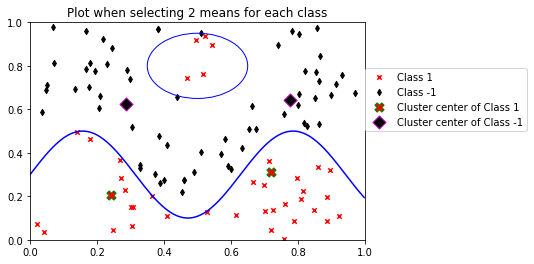

In [414]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(Circle((0.5,0.8), 0.15, color = 'b', fill = False))
ax.plot(t,yt,color = 'b')
pt1 = plt.scatter(x = C1[0,:], y = C1[1,:],c ='r', marker = 'x', s = 20)
pt2 = plt.scatter(x = CN1[0,:], y = CN1[1,:],c ='k', marker = 'd', s = 20)
pt3 = plt.scatter(x = centerp[0,:], y = centerp[1,:], c = 'r', marker = 'X', s = 85, edgecolors = 'g')
pt4 = plt.scatter(x = centern[0,:], y = centern[1,:], c = 'k', marker = 'D', s = 85, edgecolors = 'm')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend([pt1,pt2,pt3,pt4],('Class 1', 'Class -1','Cluster center of Class 1','Cluster center of Class -1'), loc = (1,.5))
plt.title('Plot when selecting 2 means for each class')
plt.show()

In [418]:
np.random.seed(3)
# Get the desired output
D = X[2,:]
# replace -1 by 0
D = np.heaviside(D,1)
# Define the Radial basis function
def rbf(x, y, sigma = 1):
    x = x.reshape((2,-1))
    dis = cdist(x.T, y.T)
    return np.exp(-0.5*np.sqrt(dis)/sigma**2)
# combine the centers from 2 classes
centers = np.hstack((centerp,centern))
# learning rate
eta = 1
# convergence threshold
epsi = 0.2
# epoch number 
epoch = 0
m = 317
# initialize errors
errors = np.zeros((m,1))
# initialize real outputs given the current w
y = np.zeros((100,1))
# initialize w
w = np.random.rand(5)
conti = True
# realize PTA
while conti ==True:
    if epoch >=m:
        print('Not converged yet, need more epoches.')
        print('But the results are saved.')
        break
    else:
        for i in range(100): 
            # this part of the loop where we calculate the errors
            inp = rbf(X[0:2,i],centers) # this is the input after the transformation with the 20 centers via rbf
            inp = np.append(inp,1) # append a 1 as the place for bias
            v = inp@w  # calc the local induced field
            out = np.heaviside(v,1)  #compute the output
            diff = out - D[i]
            if diff != 0:
                errors[epoch,:] += 1
            # this part of the loop where we update the weights
            w += eta*(D[i]-np.heaviside(v,1)) * inp.T
        
        epoch += 1
        conti = errors[(epoch-1),:]/100 > epsi
        conti = conti.astype(bool)
w0 = w

In [419]:
# mesh out the decision boundaries
epsilon = 3e-2
H0x1 = list()
H0x2 = list()

for x1 in np.arange(0,1,0.001):
    for x2 in np.arange(0,1,0.001):
        x = np.array([x1,x2])
        temp = disc(x)
        if np.abs(temp) < epsilon:
            H0x1.append(x1)
            H0x2.append(x2)

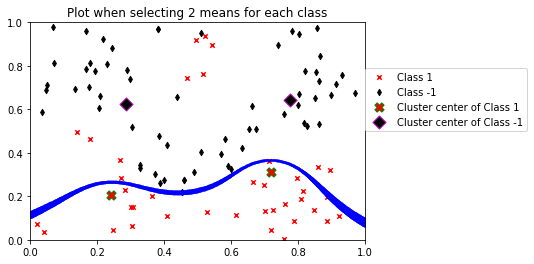

In [420]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
pt1 = plt.scatter(x = C1[0,:], y = C1[1,:],c ='r', marker = 'x', s = 20)
pt2 = plt.scatter(x = CN1[0,:], y = CN1[1,:],c ='k', marker = 'd', s = 20)
pt3 = plt.scatter(x = centerp[0,:], y = centerp[1,:], c = 'r', marker = 'X', s = 85, edgecolors = 'g')
pt4 = plt.scatter(x = centern[0,:], y = centern[1,:], c = 'k', marker = 'D', s = 85, edgecolors = 'm')
ptH0 = plt.scatter(H0x1,H0x2, c = 'b', s = 0.2, alpha = 1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend([pt1,pt2,pt3,pt4],('Class 1', 'Class -1','Cluster center of Class 1','Cluster center of Class -1'), loc = (1,.5))
plt.title('Plot when selecting 2 means for each class')
plt.show()

#### Comments:
Unlike the 0-error classification we have achieved when using 20 centers, 4 centers will leave us a converging error rate of 20%. It sounds hedious, but reasonable given the complexity of our X, especially the sun part. Thus, usually in practice, we pick the number of centers by try-and-error until we achieved a desirable error ratea. Moreover, a too large pick on the number of centers is also likely to be bad in terms of programming efficiency and potential overfitting issue. 